# Test SST Indices Calculations

In [1]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import cftime
import utils.sstIndex as sst
import utils._indexDefinitions as _index

First load up the cvdp and figure out the details of the index we want to calculate

In [7]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '005', decode_times=False)

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']


In [9]:
cvdp.time

<xarray.DataArray 'time' (time: 13872)>
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.3869e+04, 1.3870e+04,
       1.3871e+04])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.387e+04 1.387e+04 1.387e+04
Attributes:
    units:          months since 850-01-15 00:00:00
    calendar:       standard
    long_name:      Time
    standard_name:  time
    actual_range:   [    0. 13871.]

In [2]:
cvdp = cvdpTime.decodeTime(cvdp)

for keys in _index.sstIndex:
    try:
        print(keys, ": ", cvdp[keys].comment_cvdp)
    except:
        print (keys, " not defined in Cvdp")

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.005.cvdp_data.850-2005.nc']
nino12 :  area average domain (-10:0N, 270:280E)
nino3 :  area average domain (-5:5N, 210:270E)
nino34 :  area average domain (-5:5N, 190:240E)
nino4 :  area average domain (-5:5N, 160:210E)
westIO  not defined in Cvdp
eastIO  not defined in Cvdp


In [3]:
cvdp.indian_ocean_dipole.comment_cvdp

'area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)'

Next load the model outputs, but drop all the variables we don't care about

In [4]:
ds = fh.loadModelData('CESM-LME', 'SST', '005',drop_variables=('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t', 'ULAT', 'ULONG') )

Files imported: 
 ['/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.170001-179912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.120001-129912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.090001-099912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.130001-139912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.185001-200512.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.160001-169912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.110001-119912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.180001-184912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.140001-149912.nc', '/Users/ajs/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.005.pop.h.SST.085001-089912.nc', '

In [5]:
cvdp

<xarray.Dataset>
Dimensions:                         (LAT: 96, LON: 144, TIME: 1156, frequency: 6936, frequency2: 578, lat: 96, lat_amoc: 395, lev: 61, lon: 144, longitude: 65, ncurves: 4, period: 166, time: 13872, time_lag_cor: 31, time_mon1: 29, time_mon2: 12, time_mon3: 49)
Coordinates: (12/17)
  * LAT                             (LAT) float32 -90.0 -88.11 ... 88.11 90.0
  * LON                             (LON) float32 0.0 2.5 5.0 ... 355.0 357.5
  * TIME                            (TIME) int32 850 851 852 ... 2003 2004 2005
  * frequency                       (frequency) float32 7.209e-05 ... 0.5
  * frequency2                      (frequency2) float32 0.0008651 ... 0.5
  * lat                             (lat) float64 -90.0 -88.11 ... 88.11 90.0
    ...                              ...
  * period                          (period) float32 0.08609 ... 1.186e+03
  * time                            (time) object 0850-02-01 00:00:00 ... 200...
  * time_lag_cor                    (time_lag_cor) int32 -15 -14 -13 ... 14 15
  * time_mon1                       (time_mon1) int32 0 1 2 3 4 ... 25 26 27 28
  * time_mon2                       (time_mon2) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * time_mon3                       (time_mon3) int32 0 1 2 3 4 ... 45 46 47 48
Data variables: (12/347)
    amo_pattern_lowpass_mon         (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pattern_mon                 (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pr_regression_lowpass_mon   (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_pr_regression_mon           (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    amo_spectra                     (ncurves, frequency) float32 dask.array<chunksize=(4, 6936), meta=np.ndarray>
    amo_tas_regression_lowpass_mon  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    ...                              ...
    tas_trends_djf                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_jja                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_mam                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_mon                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tas_trends_son                  (lat, lon) float32 dask.array<chunksize=(96, 144), meta=np.ndarray>
    tropical_indian_ocean           (time) float32 dask.array<chunksize=(13872,), meta=np.ndarray>
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    notes:        Data from b.e11.BLMTRC5CN.f19_g16.005 from 850-2005
    climatology:  850-2005 climatology removed prior to all calculations (oth...
    Conventions:  CF-1.6
    history:      Sun Oct 27 16:41:36 2019: ncks -O /project/diagnostics/exte...
    NCO:          "4.5.2"

In [6]:
ds

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 13872, z_t: 1)
Coordinates:
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) object 0850-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: nlat, nlon, z_t
Data variables:
    TAREA    (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    SST      (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           b.e11.BLMTRC5CN.f19_g16.005
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    7757000
    tavg_sum:        2678400.0
    tavg_sum_qflux:  2678400.0
    NCO:             4.3.7
    history:         Wed Jul  9 16:35:29 2014: ncrename -v TEMP,SST b.e11.BLM...

In [5]:
%time

indexDs = sst.calculateIndex(ds)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.06 µs


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 97 times more chunks
  return self.array[key]
/Users/ajs

Do a comparison plot. Between calculated indexes and cvdp

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


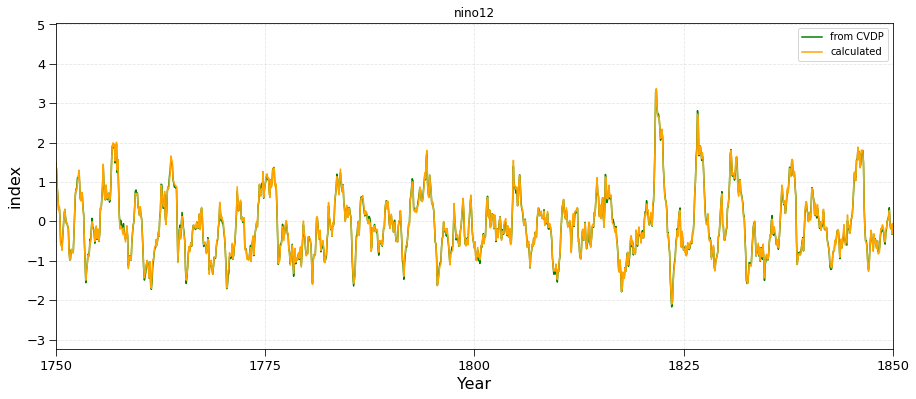

nino12  standard devition of difference:  0.04845021699883295


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


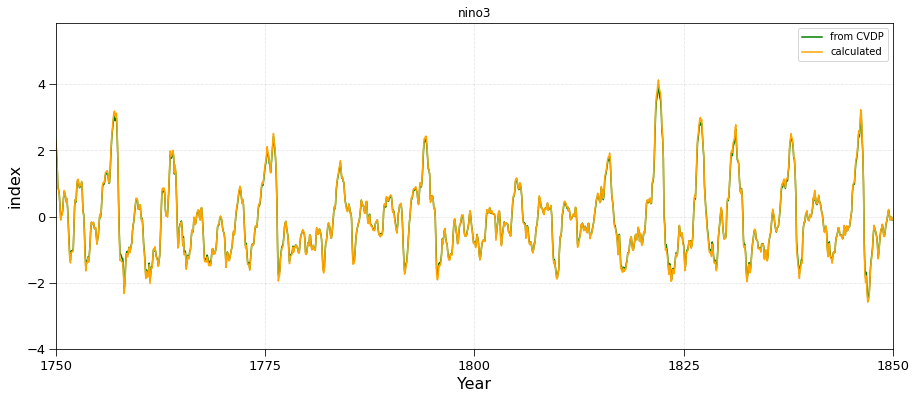

nino3  standard devition of difference:  0.05986970605687629


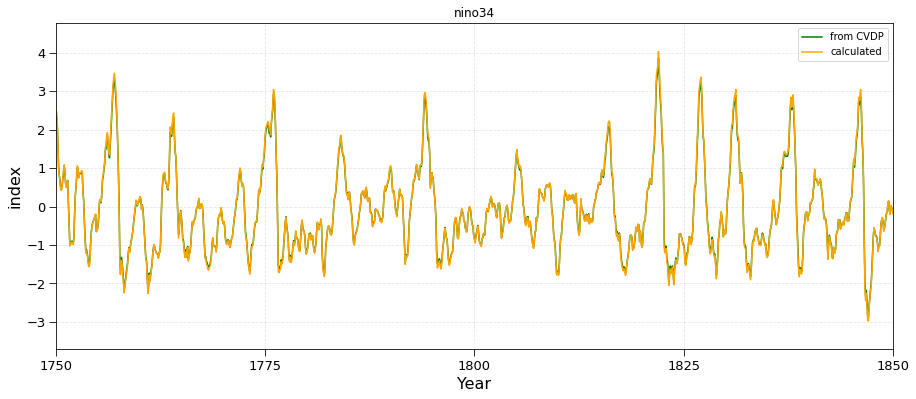

nino34  standard devition of difference:  0.054072379367523585


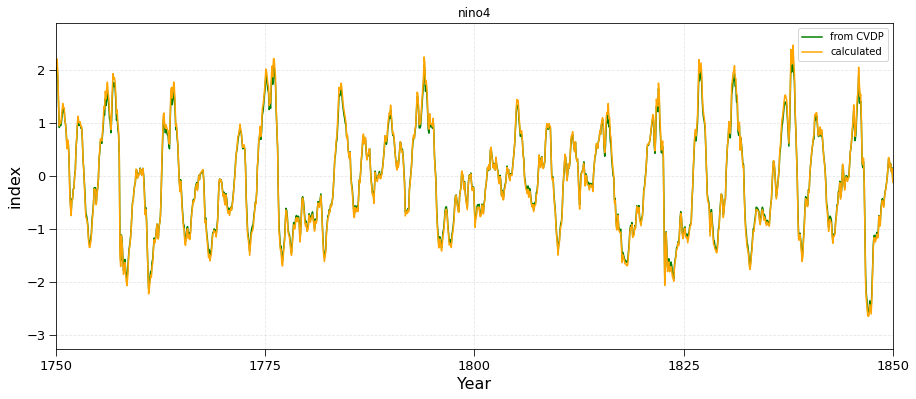

nino4  standard devition of difference:  0.06244162808981649
westIO  not defined in Cvdp
eastIO  not defined in Cvdp


In [6]:
%time

for keys in _index.sstIndex:
    
    try:
        #test if this is an index in cvdp
        cvdp[keys]

    except:
        print (keys, " not defined in Cvdp")        
        
    else:
        
        #load into memory so its doesn't get loaded twice if we want to use it later
        indexDs[keys].load()
        
        # set-up plot
        fig = plt.figure(figsize=(15,6))
        ax = fig.add_subplot(1, 1, 1)
        
        #plot the cvdp
        cvdp[keys].plot(color='green' ,label='from CVDP')
                
        #plot the calculated one
        indexDs[keys].plot(color='orange',label='calculated')
        
        #set the horizontal axis to something nice
        plt.xlim(cftime.DatetimeNoLeap(1750,1,1), cftime.DatetimeNoLeap(1850,1,1))

        #add axis names and title
        plt.title(keys)
        plt.ylabel("index", fontsize=16)  
        plt.xlabel("Year", fontsize=16)

        #make it neat
        plt.tick_params(which = 'minor', labelsize=13, length=4)
        plt.tick_params(which = 'major', labelsize=13, length=7)
        ax.grid(which='major', alpha=0.3, linestyle='dashed')

        #show the legend based on the 'labels' set above
        plt.legend()

        #make it so
        plt.show()

        print(keys, " standard devition of difference: ", (indexDs[keys]-cvdp[keys]).std().values)


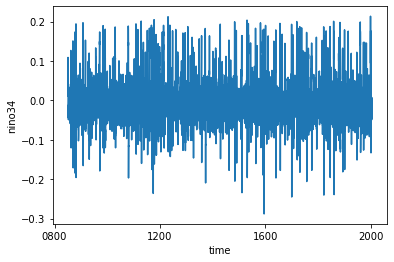

In [7]:
(indexDs.nino34-cvdp.nino34).plot()

In [9]:
indexDs.to_netcdf("results/monthlySstIndicesCalculated.nc")

/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [10]:
indexDs

,Array,Chunk
Bytes,110.98 kB,8 B
Shape,"(13872,)","(1,)"
Count,181252 Tasks,13872 Chunks
Type,float64,numpy.ndarray
